# Tensorflow Project

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

In [37]:
#import pandas
import pandas as pd

In [38]:
#read in data
data = pd.read_csv('bank_note_data.csv')

In [39]:
#first 5 rows of dataframe
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [40]:
#import visualization libraties
import seaborn as sns
%matplotlib inline

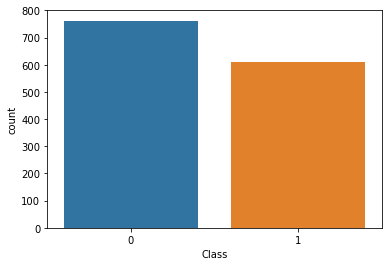

In [41]:
#Created a Countplot of the Classes (Authentic 1 vs Fake 0)
sns.countplot(x='Class',data=data)

/Users/Vlahonator/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Vlahonator/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


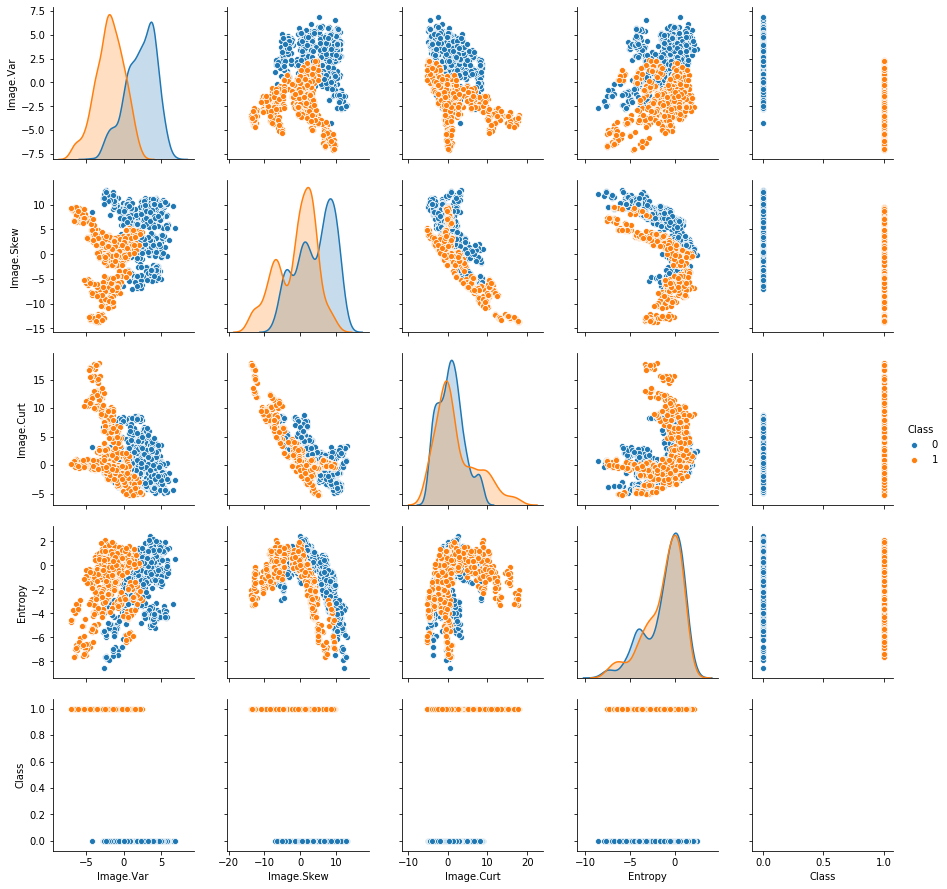

In [42]:
#Created a PairPlot of the Data with Seaborn, set Hue to Class
sns.pairplot(data,hue='Class')

In [43]:

from sklearn.preprocessing import StandardScaler

In [44]:
#Created a StandardScaler() object called scaler.
scaler = StandardScaler()

In [45]:
#Fitted scaler to the features.
scaler.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
#Used the .transform() method to transform the features to a scaled version
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [47]:
#Converted the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [48]:
#Created two objects X and y which are the scaled feature values and labels respectively.
X = df_feat

In [49]:
y = data['Class']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
import tensorflow as tf

In [53]:
#Created a list of feature column objects using tf.feature.numeric_column()
df_feat.columns


Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [54]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [55]:
feat_cols = [image_var,image_skew,image_curt,entropy]

In [56]:
#Created an object called classifier which is a DNNClassifier from learn. 
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/qf/9lg8vbt12270lh6bbvv2t0940000gn/T/tmpydbh6w_9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd601ade400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
#created a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

In [58]:
#train classifier to the input function. Used steps=500.
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/qf/9lg8vbt12270lh6bbvv2t0940000gn/T/tmpydbh6w_9/model.ckpt.
INFO:tensorflow:loss = 13.199401, step = 1
INFO:tensorflow:Saving checkpoints for 48 into /var/folders/qf/9lg8vbt12270lh6bbvv2t0940000gn/T/tmpydbh6w_9/model.ckpt.
INFO:tensorflow:Loss for final step: 0.3414967.


In [59]:
#Createc another pandas_input_fn that takes in the X_test data for x
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [60]:
#Used the predict method from the classifier model to create predictions from X_test 
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/qf/9lg8vbt12270lh6bbvv2t0940000gn/T/tmpydbh6w_9/model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [61]:
note_predictions[0]

{'logits': array([4.6638517], dtype=float32),
 'logistic': array([0.99065804], dtype=float32),
 'probabilities': array([0.00934197, 0.99065804], dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [62]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(confusion_matrix(y_test,final_preds))

[[225   6]
 [  0 181]]


In [65]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       231
           1       0.97      1.00      0.98       181

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [66]:
#Used SciKit Learn to Create a Random Forest Classifier and compared the confusion matrix and classification report to the DNN model
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(n_estimators=200)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rfc_preds = rfc.predict(X_test)

In [70]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       231
           1       0.99      1.00      0.99       181

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [71]:
print(confusion_matrix(y_test,rfc_preds))

[[229   2]
 [  0 181]]


In [36]:
conda install TensorFlow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
